In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [192]:
headphones_df = pd.read_csv('headphones.csv')
scale_df = pd.read_csv('weight+scale.csv')

In [193]:
headphones_df.head()

,asin,name,brand,list_price,buy_price,prime_price,rating,count,product_description,shipper,seller,category,url
0,B08SBSP3JY,"Classroom Headphones Bulk 5 Pack, Student On E...",Brand Sonitum,NaN,37.97,NaN,4.6,"2,263","About this item\nAMAZING SOUND, AT BULK RATES-...",Amazon,Rely On Us,\nOn-Ear Headphones,https://www.amazon.com/gp/slredirect/picassoRe...
1,B0BP6QFPP6,"Uliptz Wireless Bluetooth Headphones, 65H Play...",Brand Uliptz,NaN,26.99,19.99,4.4,"4,756",About this item\nHIGH FIDELITY AUDIO - Uliptz ...,Amazon,Uliptz Direct,\nOver-Ear Headphones,https://www.amazon.com/gp/slredirect/picassoRe...
2,NaN,Apple EarPods Headphones with Lightning Connec...,Brand Apple,29.0,17.97,NaN,4.6,"196,679","About this item\nUnlike traditional, circular ...",Amazon.com,Amazon.com,NaN,https://www.amazon.com/Apple-EarPods-Lightning...
3,NaN,Apple EarPods Headphones with Lightning Connec...,Brand Apple,29.0,17.97,NaN,4.6,"196,679","About this item\nUnlike traditional, circular ...",Amazon.com,Amazon.com,NaN,https://www.amazon.com/Apple-EarPods-Lightning...
4,B09XV4XV7T,ELECDER i45 On-Ear Headphones with Microphone ...,Brand ELECDER,NaN,14.99,9.99,4.5,"1,256",About this item\nImmersive Hi-Fi Stereo Bass B...,Amazon,ElecderDirect,\nOver-Ear Headphones,https://www.amazon.com/Elecder-i45-Ear-Headpho...


In [194]:
headphones_df.count()

asin                   543
name                   560
brand                  555
list_price             283
buy_price              548
prime_price             54
rating                 548
count                  548
product_description    556
shipper                553
seller                 553
category               545
url                    560
dtype: int64

Change string values to float and remove ',' in the strings

In [244]:
def format_price(x):
    x = str(x)
    x = x.replace(",", "")
    return float(x)

def format_rating(x):
    x = str(x)
    x = x.replace(" ", ".")
    x = x.replace("o", "0")
    return float(x)

def format_count(x):
    x = str(x)
    x = x.replace(",", "")
    return float(x)

convert_dict = {
                'buy_price': float,
                'rating': float,
                'count': float
                }
headphones_df = headphones_df.astype(convert_dict)
print(headphones_df.dtypes)

# Defining Shipped by Amazon and Sold by Amazon Columns
def amazon(val):
    if val in ['Amazon', 'Amazon.com', 'Amazon Global Store UK']:
        return 1 
    else:
        return 0
headphones_df["shipper"] = headphones_df["shipper"].apply(amazon)
headphones_df["seller"] = headphones_df["seller"].apply(amazon)

# Dropping list and prime prices
#headphones_df = headphones_df.drop(["list_price","prime_price"])
#headphones_df = headphones_df.reset_index()

#Search Order
headphones_df = headphones_df.assign(search_order=range(len(headphones_df)))
headphones_df["search_order"] = headphones_df["search_order"].astype(int)

#logPrice
headphones_df["logprice"] = np.log(headphones_df["buy_price"])

headphones_df['buy_price'] = headphones_df['buy_price'].apply(lambda x: format_price(x))
headphones_df['rating'] = headphones_df['rating'].apply(lambda x: format_rating(x))
headphones_df['count'] = headphones_df['count'].apply(lambda x: format_count(x))

headphones_df.to_csv('heaphones_clean.csv',index = False)

index                    int64
asin                    object
name                    object
brand                   object
buy_price              float64
rating                 float64
count                  float64
product_description     object
shipper                  int64
seller                   int64
category                object
url                     object
logprice               float64
dtype: object


In [245]:
avg_price = headphones_df['buy_price'].mean()
print("The average price is:", avg_price)
avg_rating = headphones_df['rating'].mean()
print("The average rating is:", avg_rating)

The average price is: 50.13839416058433
The average rating is: 4.391240875912413


<AxesSubplot: >

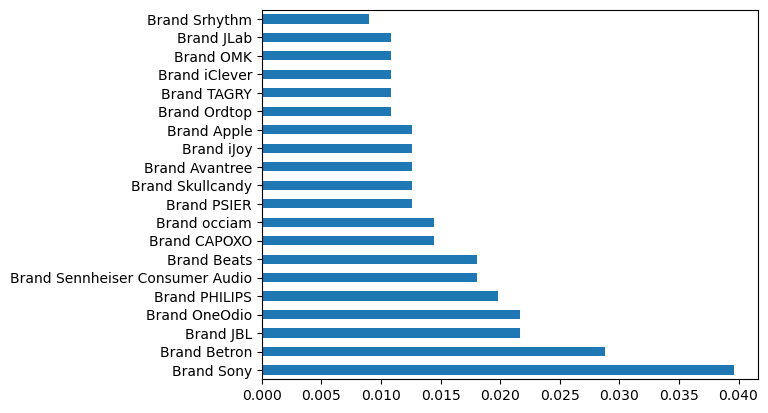

In [286]:
# Plot brand concentration
headphones_df['brand'].value_counts(normalize=True)[:20].plot(kind='barh')

In [246]:
headphones_df['buy_price']

0      37.97
1      26.99
2      17.97
3      17.97
4      14.99
       ...  
555    14.99
556    29.99
557    99.00
558    19.85
559    36.99
Name: buy_price, Length: 560, dtype: float64

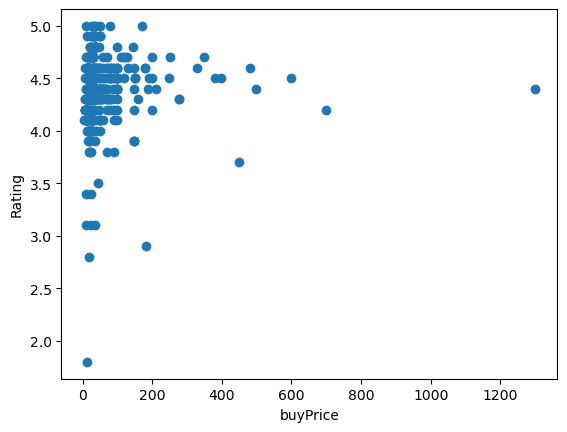

In [289]:
# Assuming the ratings are in a column called "rating" and the prices are in a column called "price"
plt.scatter(headphones_df['buy_price'], headphones_df['rating'])
plt.xlabel('buyPrice')
plt.ylabel('Rating')
plt.show()

In [248]:
#could experiment with taking out the "about this item"
def format_description(x):
    x = str(x).lower()
    x = x.lower()
    return x

headphones_df['product_description'] = headphones_df['product_description'].apply(lambda x: format_description(x))

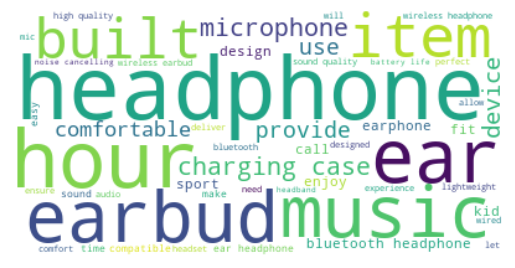

In [249]:
from wordcloud import WordCloud

# Assuming the product descriptions are in a column called "description"
text = " ".join(desc for desc in headphones_df.product_description)
wordcloud = WordCloud(max_words=50, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [250]:
count = 0
for i in headphones_df['product_description']:
    if 'item' in i:
        count += 1

In [251]:
count

555

In [252]:
headphones_df.brand.unique()

array(['Brand Sonitum', 'Brand Uliptz', 'Brand Apple', 'Brand ELECDER',
       'Brand DIUARA', 'Brand CALCINI', 'Brand INFURTURE', 'Brand TAGRY',
       'Brand Orancu', 'Brand Ordtop', 'Brand fojep', 'Brand sephia',
       'Brand Beats', 'Brand NIVAVA', 'Brand MSURTY', 'Brand kurdene',
       'Brand MOZOTER', 'Brand ASTRO Gaming', 'Brand Logitech',
       'Brand Perytong', nan, 'Brand occiam', 'Brand Sony', 'Brand JBL',
       'Brand RORSOU', 'Brand Tuitager', 'Brand LWZCAM', 'Brand BERIBES',
       'Brand Soundcore', 'Brand OneOdio', 'Brand kirababy',
       'Brand WATAHATIC', 'Brand noot products', 'Brand Betron',
       'Brand Skullcandy', 'Brand PSIER', 'Brand KVIDIO', 'Brand Srhythm',
       'Brand CTEX', 'Brand LAKKA', 'Brand Amazon Basics', 'Brand Nimizo',
       'Brand Rayhontech', 'Brand OMK', 'Brand FIFINE',
       'Brand SoundMAGIC', 'Brand Bose', 'Brand PURERINA', 'Brand EHEK',
       'Brand GNMN', 'Brand LORELEI', 'Brand HIFIMAN', 'Brand CXK',
       'Brand CAPOXO', 'Brand

In [253]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt

df = pd.read_csv('heaphones_clean.csv')

In [254]:
df.columns

Index(['index', 'asin', 'name', 'brand', 'buy_price', 'rating', 'count',
       'product_description', 'shipper', 'seller', 'category', 'url',
       'logprice', 'search_order'],
      dtype='object')

In [255]:
df.product_description.isnull().sum()

4

In [256]:
df.buy_price.isnull().sum()

12

In [257]:
df.category.isnull().sum()

15

In [258]:
df.rating.isnull().sum()

12

In [259]:
# vectorize the product descriptions using a count vectorizer
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(X_train['product_description'])
test_X = vectorizer.transform(X_test['product_description'])

In [260]:
#dropping all NAs
print("Dimensions of dataset before dropping the NAs:", df.shape)
df = df.dropna(subset=['product_description'])
df = df.dropna(subset=['buy_price'])
df = df.dropna(subset=['category'])
df = df.dropna(subset=['rating'])
print("Dimensions of dataset after dropping the NAs:", df.shape)

Dimensions of dataset before dropping the NAs: (560, 14)
Dimensions of dataset after dropping the NAs: (519, 14)


In [263]:
#df = df.astype(str)

mask = df['buy_price'].str.contains('-')

# index the DataFrame using the boolean mask to remove the rows
df = df[-mask]

In [264]:
df.buy_price[0]
def format_price(x):
    x = x.replace(",", "")
    return float(x[1:])
    
df['float_price'] = df['buy_price'].apply(lambda x: format_price(x))
df['float_rating'] = df['rating'].apply(lambda x: float(x[:3]))

In [265]:
df['float_rating']

0      4.6
1      4.4
4      4.5
5      4.8
6      4.8
      ... 
555    4.2
556    4.3
557    4.5
558    4.3
559    4.4
Name: float_rating, Length: 519, dtype: float64

In [266]:
print("Dimensions of dataset after dropping the NAs:", df.shape)

Dimensions of dataset after dropping the NAs: (519, 16)


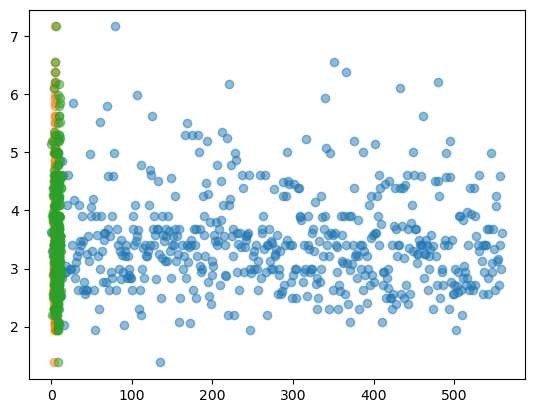

In [308]:
#Plots
plt.scatter(df["search_order"], df["logprice"], alpha=0.5)
plt.scatter(df["rating"], df["logprice"], alpha=0.5)
plt.scatter(np.log(df["count"]), df["logprice"], alpha=0.5)

In [267]:
df['num_keywords'] = df['product_description'].apply(lambda x: len(x.split()))

X_train, X_test, y_train, y_test = train_test_split(df[['num_keywords','product_description', 'rating']], df['float_price'], test_size=0.2, random_state=42)

In [268]:
# select a machine learning algorithm (in this case, linear regression)
model = LinearRegression()

# train the model on the training set
model.fit(train_X, y_train)

LinearRegression()

In [269]:
# make predictions on the testing set
y_pred = model.predict(test_X)

# evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 853.938818995376
R-squared: 0.0555184187956802


In [270]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split, RepeatedKFold, KFold, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [271]:
#defining dummies for Brand and category
df = df.merge(pd.get_dummies(df[['brand','category']]), left_index=True, right_index=True)
df = df.drop(columns=['brand','category'])

In [ ]:
#Dropping NAs and Scaling
#df = df.dropna()
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df['buy_price'])
#df_scaled = pd.DataFrame(data=df_scaled,columns=df.columns)
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("heaphones_clean.csv")

#%% Creation of a brand concentration variable
df['concentration'] = df['brand'].map(df['brand'].value_counts(normalize=True))

#%%

head=df.head()

# with smooth td-idf


tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),
                        stop_words='english',
                        min_df=3)

df = df.dropna(subset="name")
tf_idf = tf_idf_vec_smooth.fit_transform(df["name"])
 
tf_idf = pd.DataFrame(tf_idf.toarray(),columns=tf_idf_vec_smooth.get_feature_names_out())

tf_idf_scores = pd.DataFrame(tf_idf.mean())

# remerging data
df = df[["logprice","search_order","brand","rating","count","shipper","seller","category"]]
df = df.merge(tf_idf, left_index=True, right_index=True)
head=df.head()


# lasso regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split, RepeatedKFold, KFold, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Lasso(normalize=True, tol=1e-2)

In [ ]:
# Defining dummies for brand and category
df = df.merge(pd.get_dummies(df[["brand","category"]]), left_index=True, right_index=True)
df = df.drop(columns=["brand","category"])

# Drop NAs
df = df.dropna()

# Defining X and Y
Y = df["logprice"].values
X = df.drop(columns="logprice").values

# Scale X variables
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X,columns=df.columns[1:])

# Train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=123)

# Describe data
Y_test.mean()
Y_test.std()
Y_test.min()
Y_test.max()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()


#%% LASSO Function Definitions
# - From Mate Pocs: https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d

def regmodel_param_plot(
    validation_score, train_score, alphas_to_try, chosen_alpha,
    scoring, model_name, test_score = None, filename = None):
    
    plt.figure(figsize = (8,8))
    sns.lineplot(y = validation_score, x = alphas_to_try, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = alphas_to_try, 
                 label = 'training_data')
    plt.axvline(x=chosen_alpha, linestyle='--')
    if test_score is not None:
        sns.lineplot(y = test_score, x = alphas_to_try, 
                     label = 'test_data')
    plt.xlabel('alpha_parameter')
    plt.ylabel(scoring)
    plt.title(model_name + ' Regularisation')
    plt.legend()
    if filename is not None:
        plt.savefig(str(filename) + ".png")
    plt.show()
    
def regmodel_param_test(
    alphas_to_try, X, y, cv, scoring = 'r2', 
    model_name = 'LASSO', X_test = None, y_test = None, 
    draw_plot = False, filename = None):
    
    validation_scores = []
    train_scores = []
    results_list = []
    if X_test is not None:
        test_scores = []
        scorer = get_scorer(scoring)
    else:
        test_scores = None

    for curr_alpha in alphas_to_try:
        
        if model_name == 'LASSO':
            regmodel = Lasso(alpha = curr_alpha)
        elif model_name == 'Ridge':
            regmodel = Ridge(alpha = curr_alpha)
        else:
            return None

        results = cross_validate(
            regmodel, X, y, scoring=scoring, cv=cv, 
            return_train_score = True)

        validation_scores.append(np.mean(results['test_score']))
        train_scores.append(np.mean(results['train_score']))
        results_list.append(results)

        if X_test is not None:
            regmodel.fit(X,y)
            y_pred = regmodel.predict(X_test)
            test_scores.append(scorer(regmodel, X_test, y_test))
    
    chosen_alpha_id = np.argmax(validation_scores)
    chosen_alpha = alphas_to_try[chosen_alpha_id]
    max_validation_score = np.max(validation_scores)
    if X_test is not None:
        test_score_at_chosen_alpha = test_scores[chosen_alpha_id]
    else:
        test_score_at_chosen_alpha = None
        
    if draw_plot:
        regmodel_param_plot(
            validation_scores, train_scores, alphas_to_try, chosen_alpha, 
            scoring, model_name, test_scores, filename)
    
    return chosen_alpha, max_validation_score, test_score_at_chosen_alpha

The mean squared error for the linear regression model is 261843617457.898


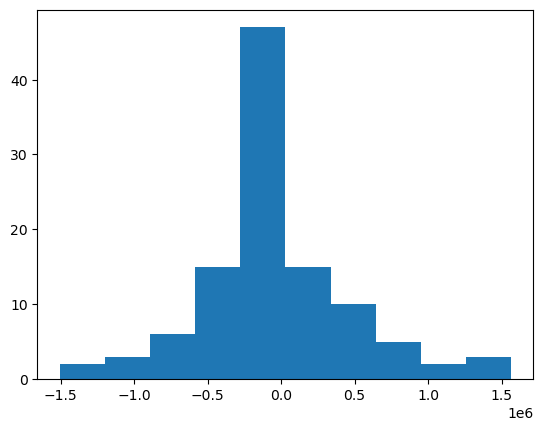

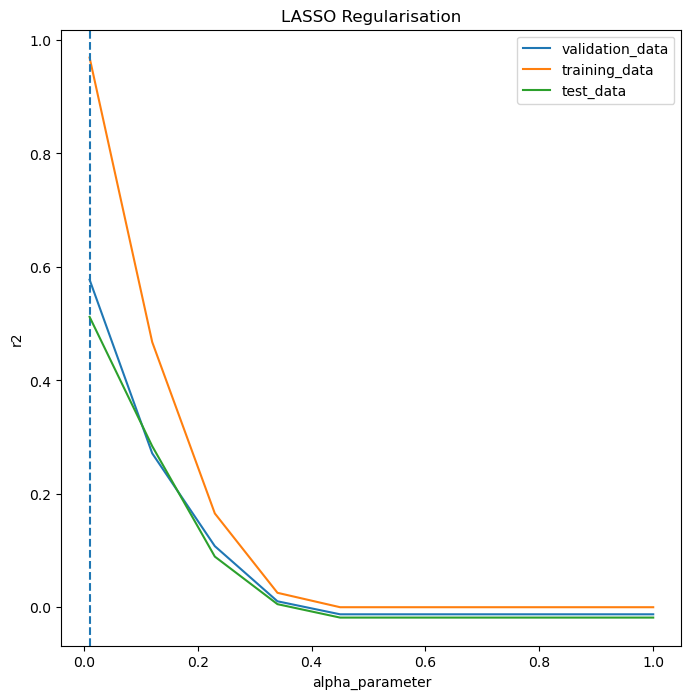

Chosen alpha: 0.01000
Validation score: 0.57745
Test score at chosen alpha: 0.51186


In [317]:
#%% Regular Linear Regression (For Baseline)

lin = LinearRegression()

lin_fit = lin.fit(X_train, Y_train)

# finding mean squared error of model
lin_preds = lin_fit.predict(X_test)
lin_mse = mean_squared_error(Y_test, lin_preds).round(3)
print(f"The mean squared error for the linear regression model is {lin_mse}")

c=lin_fit.coef_

lin_errors = Y_test - lin_preds

plt.hist(lin_errors) 

#%% CV LASSO Grid Search - First Pass
from sklearn.metrics import get_scorer

# defining a cross validation object
cv = KFold(n_splits=5, shuffle=True, random_state=123)

# defining array of alphas from 0-1 with step of 0.1
alphas = np.linspace(0.01,1,10) 

# running the functions
chosen_alpha, max_validation_score, test_score_at_chosen_alpha = \
    regmodel_param_test(
        alphas, X_train, Y_train, 
        cv, scoring = 'r2', model_name = 'LASSO', 
        X_test = X_test, y_test = Y_test, 
        draw_plot = True, filename = 'lasso_wide_search')
    
print("Chosen alpha: %.5f" % \
    chosen_alpha)
print("Validation score: %.5f" % \
    max_validation_score)
print("Test score at chosen alpha: %.5f" % \
    test_score_at_chosen_alpha)
    

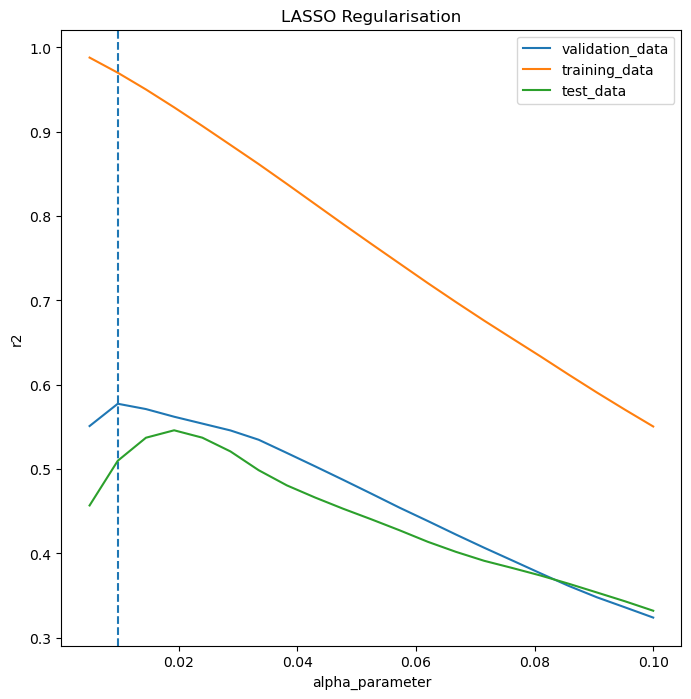

Chosen alpha: 0.00975
Validation score: 0.57744
Test score at chosen alpha: 0.50982


In [321]:
   
#%% CV LASSO Grid Search - Second Pass
# defining a cross validation object
cv = KFold(n_splits=5, shuffle=True, random_state=123)

# defining array of alphas from 0-1 with step of 0.1
alphas = np.linspace(0.005,0.1,21) 

# running the functions
chosen_alpha, max_validation_score, test_score_at_chosen_alpha = \
    regmodel_param_test(
        alphas, X_train, Y_train, 
        cv, scoring = 'r2', model_name = 'LASSO', 
        X_test = X_test, y_test = Y_test, 
        draw_plot = True, filename = 'lasso_wide_search')
    
print("Chosen alpha: %.5f" % \
    chosen_alpha)
print("Validation score: %.5f" % \
    max_validation_score)
print("Test score at chosen alpha: %.5f" % \
    test_score_at_chosen_alpha)
    


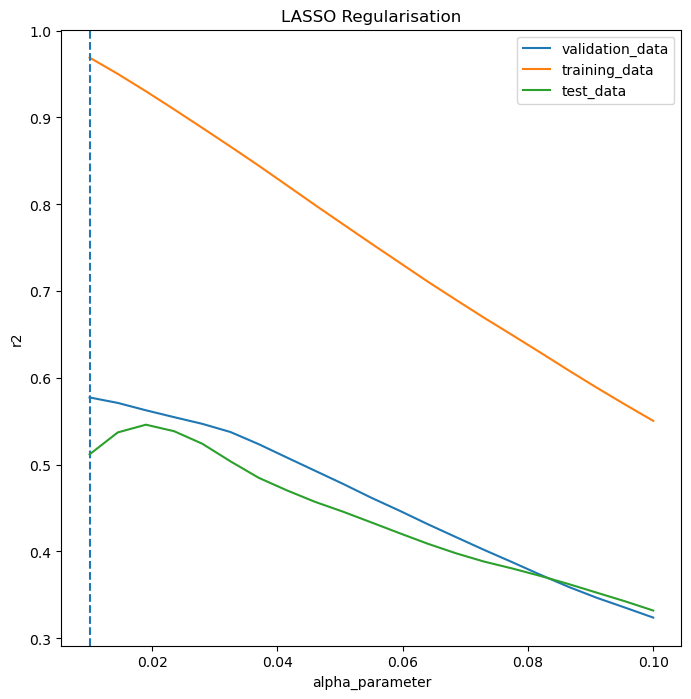

Chosen alpha: 0.01000
Validation score: 0.57745
Test score at chosen alpha: 0.51186
                                          Coefficients
search_order                                  0.000000
rating                                        0.025057
count                                        -0.000000
shipper                                       0.000000
seller                                        0.000000
...                                                ...
category_\nHeadphones & Earbuds              -0.000000
category_\nHeadsets                           0.000000
category_\nOn-Ear Headphones                 -0.000000
category_\nOver-Ear Headphones                0.000000
category_\nSingle Ear Bluetooth Headsets      0.000000

[770 rows x 1 columns]
The mean squared error for the lasso model is 0.274


In [326]:
#%% CV LASSO Grid Search - Third Pass
# defining a cross validation object
cv = KFold(n_splits=5, shuffle=True, random_state=123)

# defining array of alphas from 0-1 with step of 0.1
alphas = np.linspace(0.01,0.1,21) 

# running the functions
chosen_alpha, max_validation_score, test_score_at_chosen_alpha = \
    regmodel_param_test(
        alphas, X_train, Y_train, 
        cv, scoring = 'r2', model_name = 'LASSO', 
        X_test = X_test, y_test = Y_test, 
        draw_plot = True, filename = 'lasso_wide_search')
    
print("Chosen alpha: %.5f" % \
    chosen_alpha)
print("Validation score: %.5f" % \
    max_validation_score)
print("Test score at chosen alpha: %.5f" % \
    test_score_at_chosen_alpha)

#%% Getting Coefficients from Final Lasso Model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

model = Lasso(alpha=chosen_alpha)

fit = model.fit(X_train, Y_train)

cdf = pd.DataFrame(fit.coef_, df.columns[1:], columns=['Coefficients'])
print(cdf)

cdf["AbsCoef"] = abs(cdf["Coefficients"])

# finding mean squared error of model
preds = fit.predict(X_test)
lasso_mse = mean_squared_error(Y_test, preds).round(3)
print(f"The mean squared error for the lasso model is {lasso_mse}")

The mean squared error for the random forest model is 0.272


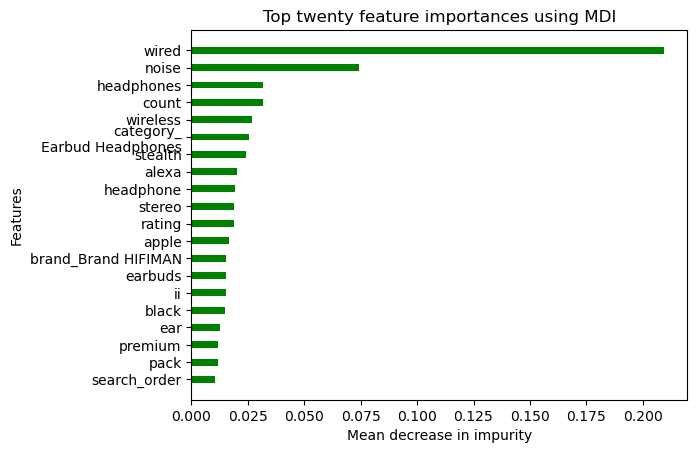

None
The mean squared error for the boosted regression model is 0.215


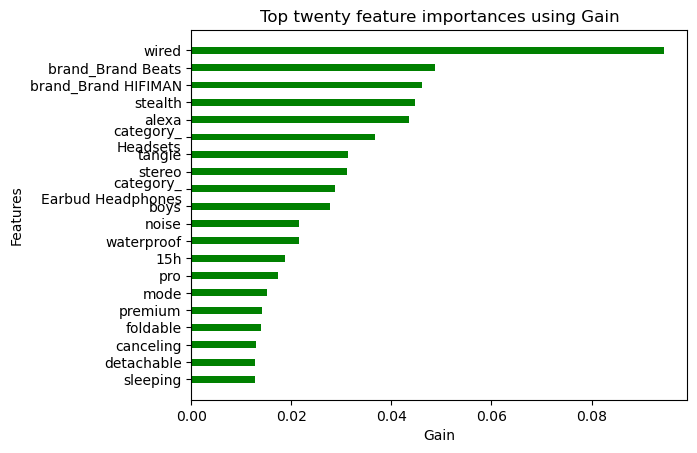

In [329]:
#%% RandomForest model
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor()

tree_fit = tree.fit(X_train, Y_train)

# finding mean squared error of model
tree_preds = tree_fit.predict(X_test)
rf_mse = mean_squared_error(Y_test, tree_preds).round(3)
print(f"The mean squared error for the random forest model is {rf_mse}")

feature_names = [f"feature {i}" for i in range(X.shape[1])]

rf_importance = pd.DataFrame(tree_fit.feature_importances_, df.columns[1:], columns=['Importance']).sort_values(by="Importance",ascending=False)
len(rf_importance[rf_importance['Importance'] > 0])

features = list(rf_importance.index)[0:20]
importances = rf_importance.values.reshape(len(rf_importance))[0:20]
 
# creating the bar plot
plt.barh(features, importances, color ='green',
        height = 0.4)
 
plt.ylabel("Features")
plt.xlabel("Mean decrease in impurity")
plt.title("Top twenty feature importances using MDI")
plt.gca().invert_yaxis() 
#plt.xticks(rotation=90)
plt.show()

#%% Boosted Regression Tree
import xgboost as xgb

# eta is equivalent to learning rate
# max_depth is the max tree depth
# subsample is proportion of sample used randomly for each tree
# colsample_bytree is the proportion of columns randomly selected to be in each tree
# alpha is regularization penalty (like lasso)
boost = xgb.XGBRegressor(n_estimators=1000, max_depth = 5, eta = 0.1, subsample = 1, colsample_bytree = 0.91, alpha = 0)

boost_fit = boost.fit(X_train, Y_train)

print(boost.importance_type)

# finding mean squared error of model
boost_preds = boost_fit.predict(X_test)
boost_mse = mean_squared_error(Y_test, boost_preds).round(3)
print(f"The mean squared error for the boosted regression model is {boost_mse}")

boost_importance = pd.DataFrame(boost_fit.feature_importances_, df.columns[1:], columns=['Importance']).sort_values(by="Importance",ascending=False)
len(boost_importance[boost_importance['Importance'] > 0])
len(boost_importance)

boost_features = list(boost_importance.index)[0:20]
boost_importances = boost_importance.values.reshape(len(boost_importance))[0:20]

# creating the bar plot
plt.barh(boost_features, boost_importances, color ='green',
        height = 0.4)
 
plt.ylabel("Features")
plt.xlabel("Gain")
plt.title("Top twenty feature importances using Gain")
plt.gca().invert_yaxis() 
#plt.xticks(rotation=90)
plt.show()

mse = pd.DataFrame([lin_mse, lasso_mse, rf_mse, boost_mse],["Linear Regression - BoW","LASSO - BoW","RandomForest - BoW","Gradient Boosted Tree - BoW"])

In [298]:
len(df. columns)

771

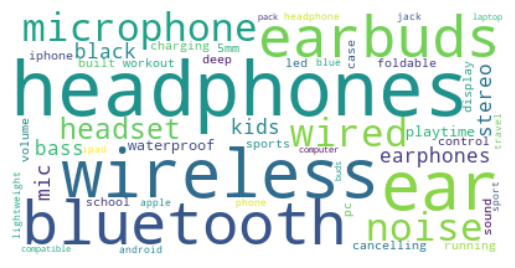

In [303]:
from wordcloud import WordCloud

# Word Cloud with TF-IDF
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(tf_idf.T.sum(axis=1))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()